# Sign Language Translator

## Importamos las librerias

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os

## Importamos los datos

Reescalamos los datos para normalizarlos

In [2]:
gen = ImageDataGenerator(rescale = 1/255)

Ahora cargamos los datos usando flow_from_directory() para que ademas pille las categorias de las imagenes.

In [3]:
train = gen.flow_from_directory('../Data/Train', color_mode='rgb', batch_size=32, class_mode='categorical', target_size = (480,720))
test = gen.flow_from_directory('../Data/Test', color_mode='rgb', batch_size=32, class_mode='categorical', target_size = (480,720))

Found 1420 images belonging to 24 classes.
Found 368 images belonging to 24 classes.


## Creamos el primer modelo

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(8,(4,4),activation='relu',input_shape=(480, 720, 3)))
model.add(layers.MaxPooling2D((5,5)))
model.add(layers.Conv2D(8,(4,4),activation='relu'))
model.add(layers.MaxPooling2D((5,5)))
model.add(layers.Flatten())
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(24, activation='softmax'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 477, 717, 8)       392       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 95, 143, 8)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 92, 140, 8)        1032      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 18, 28, 8)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4032)              0         
                                                                 
 dense_2 (Dense)             (None, 6)                

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history_final = model.fit(train, epochs = 15,batch_size = 128,validation_data=test)

Epoch 1/15
45/45 [==============================] - 118s 3s/step - loss: 3.1172 - accuracy: 0.0887 - val_loss: 3.0501 - val_accuracy: 0.0924
Epoch 2/15
45/45 [==============================] - 114s 3s/step - loss: 2.8106 - accuracy: 0.1972 - val_loss: 2.9184 - val_accuracy: 0.1359
Epoch 3/15
45/45 [==============================] - 115s 3s/step - loss: 2.4550 - accuracy: 0.2768 - val_loss: 2.6312 - val_accuracy: 0.2527
Epoch 4/15
45/45 [==============================] - 111s 2s/step - loss: 2.2328 - accuracy: 0.3246 - val_loss: 2.5977 - val_accuracy: 0.2011
Epoch 5/15
45/45 [==============================] - 136s 3s/step - loss: 2.0648 - accuracy: 0.3746 - val_loss: 2.5791 - val_accuracy: 0.2582
Epoch 6/15
45/45 [==============================] - 127s 3s/step - loss: 1.8955 - accuracy: 0.4148 - val_loss: 2.5770 - val_accuracy: 0.2663
Epoch 7/15
45/45 [==============================] - 112s 2s/step - loss: 1.7575 - accuracy: 0.4606 - val_loss: 2.5670 - val_accuracy: 0.2609
Epoch 8/15
45

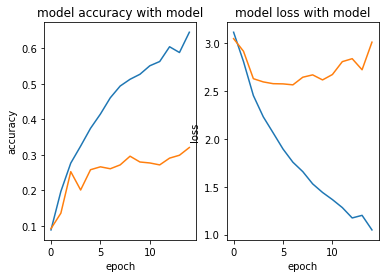

In [14]:
f, axarr = plt.subplots(nrows=1,ncols=2)
plt.sca(axarr[0]); 
plt.plot(history_final.history['accuracy'])
plt.plot(history_final.history['val_accuracy'])
plt.title('model accuracy with model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend
plt.sca(axarr[1]); 
plt.plot(history_final.history['loss'])
plt.plot(history_final.history['val_loss'])
plt.title('model loss with model')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()